# Gradient Descent

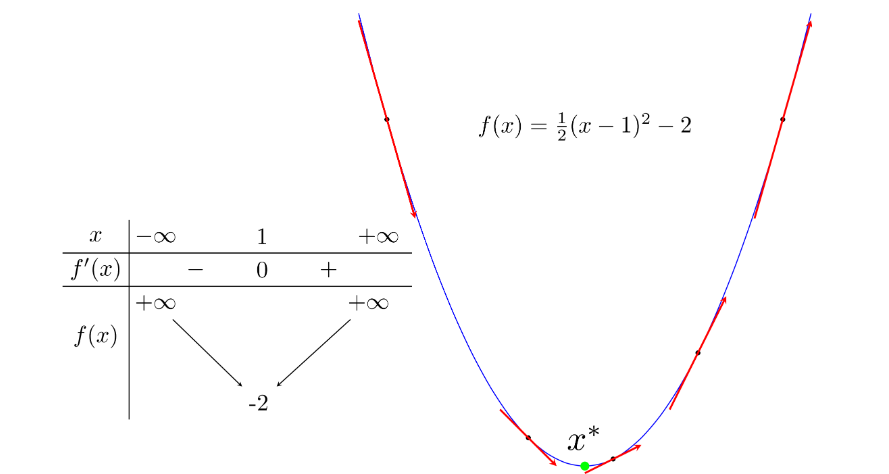

The green point is the **local minimum**, and it is also the point where the function has its minimum value. The **global minimum** is a special case of the local minimum.

Suppose we are interested in a function of one variable that has derivatives everywhere. Let me repeat a few familiar things:

- The local minimum $x^{*}$ point of the function is the point whose derivative
$f'(x^{*})$ is zero. Furthermore, in its neighborhood, the derivatives of the points to the left of $x^{*}$ are non-positive, and the derivatives of the points to the right of $x^*$ are non-negative.

- The tangent line to the graph of that function at any point has a slope equal to the derivative of the function at that point.

In the figure above, the points to the left of the green local minimum have negative derivatives, the points to the right have positive derivatives. And for this function, the further to the left of the local minimum, the more negative the derivative, the further to the right, the more positive the derivative.

In Machine Learning in particular and Optimization Mathematics in general, *we often have to find the minimum (or sometimes the maximum) value of a function*. For example, the loss functions in the two articles **Linear Regression** and **K-means Clustering**. In general, finding the global minimum of loss functions in Machine Learning is **very complicated, even impossible**. Instead, people often try to find local minimum points, and to some extent, consider them as the desired solution of the problem.

Local minimums are solutions to a derivative equation that equals zero. If we could somehow find all (finite) local minimums, we could just plug each local minimum into the function and find the point that makes the function a minimum (sounds familiar, right?). However, in most cases, it is impossible to solve a derivative equation that equals zero. This could be due to the complexity of the form of the derivative, the high-dimensionality of the data points, or the sheer number of data points.

The most common approach is to start from a point that we consider to be close to the solution of the problem, and then use an iterative operation to gradually approach the desired point, that is, until the derivative is close to 0. Gradient Descent (abbreviated as GD) and its variants are among the most widely used methods.

### Gradient Descent for 1 variable function

Going back to the original drawing and some of the observations I made. Suppose $x_t$ is the point we find after the $t$ loop. We need to find an algorithm to bring $x_t$ as close to $x^*$ as possible.

In the first graph, we have two more observation:

- If the derivative of the function at $x_t: f'(x_t) > 0$ then $x_t$ lies to the right of $x^*$ (and vice versa). For the next $x_{t + 1}$ closer to $x^*$, we need to move $x_t$ to the left, which is negative. In other words, we need to move the derivative in the opposite direction:

$$x_{t +1} = x_t + \Delta$$

Where $\Delta$ is a quantity with the opposite sign to the derivative $f'(x_t)$

- The farther $x_t$ is to the right, the greater $f'(x_t)$ is (and vice versa). So the displacement of $\Delta$, most intuitively, proportional to $-f'(x_t)$.

From two observation above, we can conclude:

$$x_{t + 1} = x_t - \eta f'(x_t)$$

Where:
- $\eta$ called learning rate
- The minus sign shows that we have to go in the opposite direction of the derivative (This is also the reason why this method is called Gradient Descent - descent means going in the opposite direction)

The above simple observations, although not true for all problems, are the foundation for many optimization methods in general and Machine Learning algorithms in particular.

![Gradient Descent Example](img/gd_example.gif)

### Different Learning Rate

The convergence rate of GD depends not only on the initial starting point but also on the learning rate. Here is an example with the same initial point $x_0 = -5$ but the learning rate fix:

![Small LR](./img/gd_slow.gif)

With a small learning rate $\eta = 0.01$, the convergence speed is very slow. In this example, I chose the maximum of 100 iterations, so the algorithm stops before reaching the goal, even though it is very close. In practice, when the calculation becomes complicated, a learning rate that is too low will affect the speed of the algorithm so much that it will never reach the goal.

![LR large](./img/gd_overshoot.gif)

With large learning rate $\eta = 0.5$, the algorithm gets very close to the goal after a few iterations. However, the algorithm fails to converge because the jump is too large, causing it to circle around the goal. (Other name of this problem is **Overshooting**)

Choosing the learning rate is very important in practical problems. Choosing this value depends a lot on each problem and requires some experimentation to choose the best value. In addition, depending on some problems, GD can work more effectively by choosing a suitable learning rate or choosing a different learning rate in each iteration.

### Gradient Descent for multiple variable function

Suppose we want to find the global minimum of a function $f(\theta)$, where $\theta$ is a vector representing the set of parameters of a model that we aim to optimize (e.g., in Linear Regression, the parameters are the coefficients stored in $\mathbf{w}$). The derivative of the function $f(\theta)$ at any point $\theta$ is denoted as $\nabla f(\theta)$ (also called the gradient).

Similar to the single-variable case, the Gradient Descent (GD) algorithm for multivariable functions starts with an initial guess $\theta_0$ and iteratively updates it as follows:

$$
\theta_{t} = \theta_{t - 1} - \eta \nabla f(\theta_{t - 1})
$$

Or equivalently in vector notation:

$$
\theta_t = \theta_{t - 1} - \eta \times \frac{1}{N} \nabla_{\theta} J(\theta_{t - 1}, x, y)
$$

Where:
- $\theta_t$: The parameters (weights) at iteration $t$
- $\eta$: learning rate (In some other book, it is denoted as $\alpha$)
- $\nabla_{\theta} J(\theta_{t - 1}, x, y)$: The gradient of the cost function respect for entire dataset

Key Reminder: **Always move in the opposite direction of the gradient.**

### Gradient Checking

Calculating derivatives of multivariable functions is usually complex and prone to errors. If we compute the derivatives incorrectly, the Gradient Descent (GD) algorithm cannot function properly. In practice, there is a way to check whether the computed derivative is accurate or not. This method is based on the definition of the derivative (for a single-variable function):

$$
f'(x) = \lim_{\epsilon \to 0} \frac{f(x + \epsilon) - f(x)}{\epsilon}
$$


A commonly used approach is to take a very small value of $\epsilon$, for example $10^{-6}$, and use the following formula:

$$
f'(x) \approx \frac{f(x + \epsilon) - f(x - \epsilon)}{2\epsilon} \tag{2}
$$

This calculation is known as the *numerical gradient*.

***Question***:
Why is the approximation formula above widely used, instead of using the one-sided approximations for the derivative (either left or right)?

There are two explanations for this issue: one based on geometry and another based on analysis.

### Explanation with Geometry

Refer to the diagram below:

![Gradient Check](./img/2_side_approx_derif.png)

In the diagram, the red vector represents the **exact derivative** of the function at the point with coordinate $x_0$. The blue vector (which may look slightly faded due to conversion issues) represents the **one-sided numerical approximation** using the forward difference method. The green vector represents the **one-sided numerical approximation** using the backward difference method. The brown vector represents the **central difference method**, which averages both one-sided differences. Among these, the central difference vector is closest to the red vector in both magnitude and direction.

The difference between these approximation methods becomes more pronounced if the function at point $x$ has strong curvature. In such cases, the forward and backward approximations may differ significantly, while the central difference method is **more stable**.

### Explanation Using Calculus

Let us revisit Taylor series expansion from calculus for further clarification.

For a very small $\epsilon$, the Taylor expansions for $f(x+\epsilon)$ and $f(x-\epsilon)$ are:

$$
f(x + \epsilon) \approx f(x) + f'(x)\epsilon + \frac{f''(x)}{2}\epsilon^2 + \dots
$$

and:

$$
f(x - \epsilon) \approx f(x) - f'(x)\epsilon + \frac{f''(x)}{2}\epsilon^2 - \dots
$$

From these, we can derive:

1. Forward difference approximation:
   $$
   \frac{f(x+\epsilon) - f(x)}{\epsilon} \approx f'(x) + \frac{f''(x)}{2}\epsilon + \dots = f'(x) + \mathcal{O}(\epsilon)
   $$

2. Central difference approximation:
   $$
   \frac{f(x+\epsilon) - f(x-\epsilon)}{2\epsilon} \approx f'(x) + \frac{f^{(3)}(x)}{6}\epsilon^2 + \dots = f'(x) + \mathcal{O}(\epsilon^2)
   $$

Thus, the error for the forward difference formula (Forward diff) is $\mathcal{O}(\epsilon)$, whereas the error for the central difference formula (Central diff) is $\mathcal{O}(\epsilon^2)$, which is significantly smaller when $\epsilon$ is small.